In [67]:
#importing the libraries
import pandas as pd
import numpy as np

In [68]:
#loading the dataset
bollywood_df=pd.read_csv(r"C:\Users\dell\Desktop\Current\Machine Learning\Python Programs\PYTHON_DATA\BOLLYWOOD.csv")

In [69]:
#printing the metadata
bollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
Genre-Defind             149 non-null object
Movie_Content            149 non-null object
Dir_CAT                  149 non-null object
Item_Song(Y/N)           149 non-null int64
Budget                   149 non-null int64
Youtube_Views            149 non-null int64
Youtube_Likes            149 non-null int64
Youtube_Dislikes         149 non-null int64
Box_Office_Collection    149 non-null int64
dtypes: int64(6), object(3)
memory usage: 10.6+ KB


In [70]:
#displaying the first ten records
bollywood_df.head(10)

,Genre-Defind,Movie_Content,Dir_CAT,Item_Song(Y/N),Budget,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Box_Office_Collection
0,Thriller / Suspense / Horror,Prequel / Sequel,LK,1,12,13798789,15708,5226,27
1,Thriller / Suspense / Horror,Masala,LK,1,18,8788913,18907,2940,25
2,Thriller / Suspense / Horror,Masala,LK,0,20,6698987,6750,2234,14
3,Thriller / Suspense / Horror,Masala,LK,0,13,5592977,15464,1513,32
4,Romance,Masala,LK,0,48,5192338,6928,1120,22
5,Drama,Masala,A,1,40,5176897,10672,1392,34
6,Thriller / Suspense / Horror,Masala,LK,0,12,4823892,5797,227,2
7,Action / Sci Fi,Social subject,LK,0,27,4687259,13219,1605,14
8,Comedy,Masala,LK,0,5,4674795,3706,762,12
9,Comedy,Masala,LK,1,16,4321162,10126,964,28


In [71]:
#craeting a variable with all the independent features
X_features = list(bollywood_df)
X_features.remove('Box_Office_Collection')
X_features

['Genre-Defind',
 'Movie_Content',
 'Dir_CAT',
 'Item_Song(Y/N)',
 'Budget',
 'Youtube_Views',
 'Youtube_Likes',
 'Youtube_Dislikes']

In [72]:
#creating dummy variables for the cateogorical varibles in X_features
encoded_bollywood_df = pd.get_dummies(bollywood_df[X_features],drop_first = True)
list(encoded_bollywood_df.columns)
X_features=encoded_bollywood_df.columns

In [73]:
#defining the X and Y inputs to the model 
import statsmodels.api as sm 
Y = bollywood_df.Box_Office_Collection
X = sm.add_constant(encoded_bollywood_df)

In [74]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [75]:
#building the model on the tarining dataset
bollywood_model=sm.OLS(Y_train,X_train).fit()
bollywood_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Box_Office_Collection   R-squared:                       0.688
Model:                               OLS   Adj. R-squared:                  0.618
Method:                    Least Squares   F-statistic:                     9.756
Date:                   Wed, 23 Oct 2019   Prob (F-statistic):           3.30e-14
Time:                           11:30:51   Log-Likelihood:                -569.22
No. Observations:                    104   AIC:                             1178.
Df Residuals:                         84   BIC:                             1231.
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        50.6619     53.006      0.956      0.342     -54.746     156.069
Item_Song(Y/N)                               14.7498     14.660      1.006      0.317     -14.403      43.902
Budget                                        1.0835      0.361      3.002      0.004       0.366       1.801
Youtube_Views                             -4.507e-06   4.01e-06     -1.125      0.264   -1.25e-05    3.46e-06
Youtube_Likes                                 0.0032      0.001      2.565      0.012       0.001       0.006
Youtube_Dislikes                              0.0069      0.009      0.743      0.459      -0.012       0.025
Genre-Defind_Action / Sci Fi                -28.6859     24.387     -1.176      0.243     -77.181      19.810
Genre-Defind_Comedy                          -8.3901     20.176     -0.416      0.679     -48.512      31.732
Genre-Defind_Romance                         10.1044     23.125      0.437      0.663     -35.882      56.090
Genre-Defind_Thriller / Suspense / Horror   -13.4076     22.207     -0.604      0.548     -57.569      30.754
Movie_Content_Art                           -69.3472     82.116     -0.844      0.401    -232.645      93.950
Movie_Content_Biography                      16.8517     65.921      0.256      0.799    -114.239     147.943
Movie_Content_Book / Novel                    6.6143     82.244      0.080      0.936    -156.938     170.166
Movie_Content_Masala                          7.4809     47.659      0.157      0.876     -87.294     102.255
Movie_Content_Prequel / Sequel               18.7307     55.287      0.339      0.736     -91.214     128.675
Movie_Content_Remake                        -10.9451     70.854     -0.154      0.878    -151.847     129.957
Movie_Content_Satire                        160.0131     59.917      2.671      0.009      40.862     279.164
Movie_Content_Social Subject                 22.6237     61.656      0.367      0.715     -99.986     145.234
Dir_CAT_B                                   -44.7655     24.128     -1.855      0.067     -92.746       3.215
Dir_CAT_LK                                  -67.6038     22.877     -2.955      0.004    -113.098     -22.110
==============================================================================
Omnibus:                       66.428   Durbin-Watson:                   2.297
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.045
Skew:                           1.943   Prob(JB):                    1.41e-102
Kurtosis:                      12.651   Cond. No.                     1.17e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the

In [76]:
#checking for multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    X_matrix=X.values
    vif=[variance_inflation_factor(X_matrix,i) for i in range (X_matrix.shape[1])]
    vif_factors=pd.DataFrame()
    vif_factors['column']=X.columns
    vif_factors['VIF']=vif
    return vif_factors

In [77]:
vif_factors=get_vif_factors(X[X_features])
vif_factors

,column,VIF
0,Item_Song(Y/N),2.020047
1,Budget,5.649909
2,Youtube_Views,11.207197
3,Youtube_Likes,9.106332
4,Youtube_Dislikes,7.786454
5,Genre-Defind_Action / Sci Fi,2.548609
6,Genre-Defind_Comedy,2.449715
7,Genre-Defind_Romance,2.143196
8,Genre-Defind_Thriller / Suspense / Horror,2.478575
9,Movie_Content_Art,1.084528


In [78]:
#checking correlation of columns with large VIFs
columns_with_large_vif=vif_factors[vif_factors.VIF>6].column

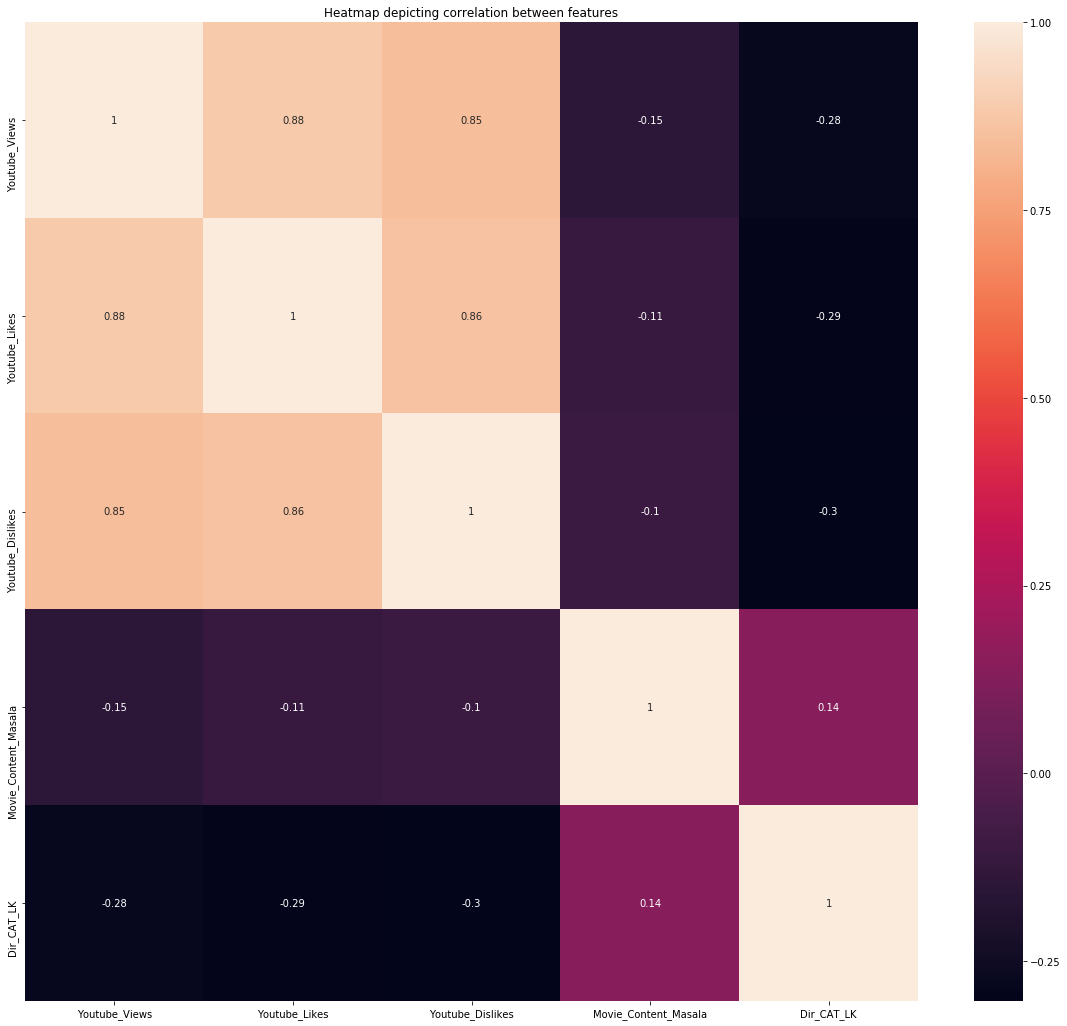

In [79]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(20,18))
sn.heatmap(X[columns_with_large_vif].corr(), annot=True);
plt.title("Heatmap depicting correlation between features");

In [80]:
columns_to_be_removed=["Youtube_Views","Youtube_Dislikes"]

In [81]:
X_new_features=list(set(X_features)-set(columns_to_be_removed))

In [82]:
get_vif_factors(X[X_new_features])

,column,VIF
0,Movie_Content_Prequel / Sequel,2.313734
1,Dir_CAT_B,2.431049
2,Genre-Defind_Comedy,2.407613
3,Youtube_Likes,2.440023
4,Dir_CAT_LK,6.730923
5,Item_Song(Y/N),2.015824
6,Genre-Defind_Action / Sci Fi,2.391190
7,Movie_Content_Biography,1.194452
8,Genre-Defind_Romance,2.063477
9,Budget,4.901377


In [83]:
X_train=X_train[X_new_features]
bollywood_2=sm.OLS(Y_train,X_train).fit()
bollywood_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Box_Office_Collection   R-squared:                       0.762
Model:                               OLS   Adj. R-squared:                  0.715
Method:                    Least Squares   F-statistic:                     16.37
Date:                   Wed, 23 Oct 2019   Prob (F-statistic):           2.97e-20
Time:                           11:30:53   Log-Likelihood:                -570.55
No. Observations:                    104   AIC:                             1175.
Df Residuals:                         87   BIC:                             1220.
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Movie_Content_Prequel / Sequel               53.8539     35.037      1.537      0.128     -15.785     123.493
Dir_CAT_B                                   -40.6623     22.558     -1.803      0.075     -85.500       4.175
Genre-Defind_Comedy                          -9.0687     19.793     -0.458      0.648     -48.409      30.272
Youtube_Likes                                 0.0031      0.001      4.716      0.000       0.002       0.004
Dir_CAT_LK                                  -57.8917     20.248     -2.859      0.005     -98.136     -17.647
Item_Song(Y/N)                               14.6536     14.575      1.005      0.317     -14.316      43.623
Genre-Defind_Action / Sci Fi                -34.9237     23.102     -1.512      0.134     -80.842      10.994
Movie_Content_Biography                      58.4924     49.336      1.186      0.239     -39.567     156.552
Genre-Defind_Romance                          5.9572     22.667      0.263      0.793     -39.096      51.010
Budget                                        1.1839      0.329      3.603      0.001       0.531       1.837
Movie_Content_Book / Novel                   30.3921     72.347      0.420      0.675    -113.406     174.190
Movie_Content_Art                           -32.8913     65.211     -0.504      0.615    -162.505      96.723
Movie_Content_Satire                        194.6066     42.581      4.570      0.000     109.972     279.241
Genre-Defind_Thriller / Suspense / Horror   -17.1635     21.647     -0.793      0.430     -60.190      25.863
Movie_Content_Remake                         35.4118     50.683      0.699      0.487     -65.327     136.150
Movie_Content_Social Subject                 61.9576     45.601      1.359      0.178     -28.679     152.594
Movie_Content_Masala                         45.0553     23.872      1.887      0.062      -2.394      92.504
==============================================================================
Omnibus:                       63.282   Durbin-Watson:                   2.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              399.603
Skew:                           1.872   Prob(JB):                     1.69e-87
Kurtosis:                      11.843   Cond. No.                     1.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
significant_var=['Dir_CAT_B','Youtube_Likes','Dir_CAT_LK','Budget','Movie_Content_Masala']
X_train=X_train[significant_var]
bollywood_3=sm.OLS(Y_train,X_train).fit()
bollywood_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Box_Office_Collection   R-squared:                       0.676
Model:                               OLS   Adj. R-squared:                  0.660
Method:                    Least Squares   F-statistic:                     41.31
Date:                   Wed, 23 Oct 2019   Prob (F-statistic):           9.07e-23
Time:                           11:30:53   Log-Likelihood:                -586.55
No. Observations:                    104   AIC:                             1183.
Df Residuals:                         99   BIC:                             1196.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Dir_CAT_B               -8.4964     19.716     -0.431      0.667     -47.617      30.624
Youtube_Likes            0.0033      0.001      4.916      0.000       0.002       0.005
Dir_CAT_LK             -21.2246     14.485     -1.465      0.146     -49.966       7.517
Budget                   1.4450      0.302      4.792      0.000       0.847       2.043
Movie_Content_Masala     1.4237     15.378      0.093      0.926     -29.090      31.938
==============================================================================
Omnibus:                      117.267   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2277.010
Skew:                           3.746   Prob(JB):                         0.00
Kurtosis:                      24.664   Cond. No.                     5.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Figure size 576x432 with 0 Axes>

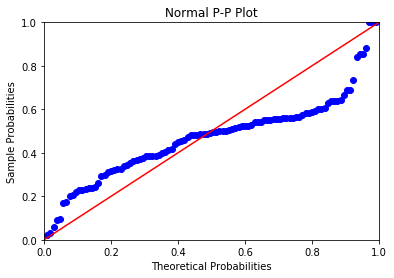

In [86]:
#residual analysis
#test for normality of residuals(P-P Plot)bollywood_3_residual=bollywood_3.resid
probplot=sm.ProbPlot(bollywood_3_residual)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title("Normal P-P Plot")
plt.show()

In [87]:
def get_std_val(vals):
    return (vals-vals.mean())/vals.std()

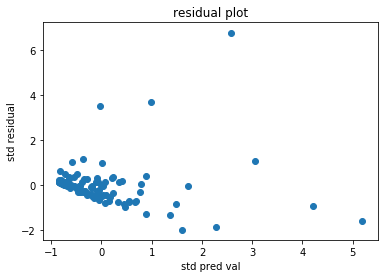

In [88]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.scatter(get_std_val(bollywood_3.fittedvalues),get_std_val(bollywood_3_residual))
plt.title("residual plot");
plt.xlabel("std pred val");
plt.ylabel("std residual");